# AS4PA - Laboratory session 2

`Student:` **```Ardino Rocco```**<br>
`Master :` **```Physics of Data```**<br>
`Id     :` **```1231629```**<br>
`Mail   :` **```rocco.ardino@studenti.unipd.it```**<br>

# Index <a class="anchor" id="ExI"></a>

0. [Exercise 0](#Ex0.)<br>
    0.1. [Binomial](#Ex0.1.)<br>
    0.2. [Negative Binomial](#Ex0.2.)<br>
    0.3. [Poisson](#Ex0.3.)<br>
    0.4. [Geometric](#Ex0.4.)<br>
1. [Exercise 1](#Ex1.)<br>
2. [Exercise 2](#Ex2.)<br>
    2.1. [Simulation of 50 people (samples)](#Ex2.1.)<br>
    2.2. [Probability calculation 1](#Ex2.2.)<br>
    2.3. [Average waiting time calculation and comparison](#Ex2.3.)<br>
    2.4. [Probability calculation 2](#Ex2.4.)<br>
3. [Exercise 3](#Ex3.)<br>
4. [Exercise 4](#Ex4.)<br>
5. [Exercise 5](#Ex5.)<br>
    5.1. [Gender distribution](#Ex5.1.)<br>
    5.2. [Number of towns grouped per province and per region](#Ex5.2.)<br>
    5.3. [Distribution of the age (years only) of the mayors](#Ex5.3.)<br>
    5.4. [Distribution of the time the mayor is in charge](#Ex5.4.)<br>

***
## Exercise 0 <a class="anchor" id="Ex0."></a>
* [Index](#ExI)
***

**Let's consider the most common discrete probability distributions:**

* $\text{Binom}(N,p)$
* $\text{NBinom}(r,p)$
* $\text{Pois}(\lambda)$
* $\text{Geom}(p)$

**Here we define the number of data to sample from the distributions**

In [1]:
N <- 10000

**Load package for plot resizing (only for Jupyter)**

In [2]:
library(repr)

### 0.1. - Binomial <a class="anchor" id="Ex0.1."></a>

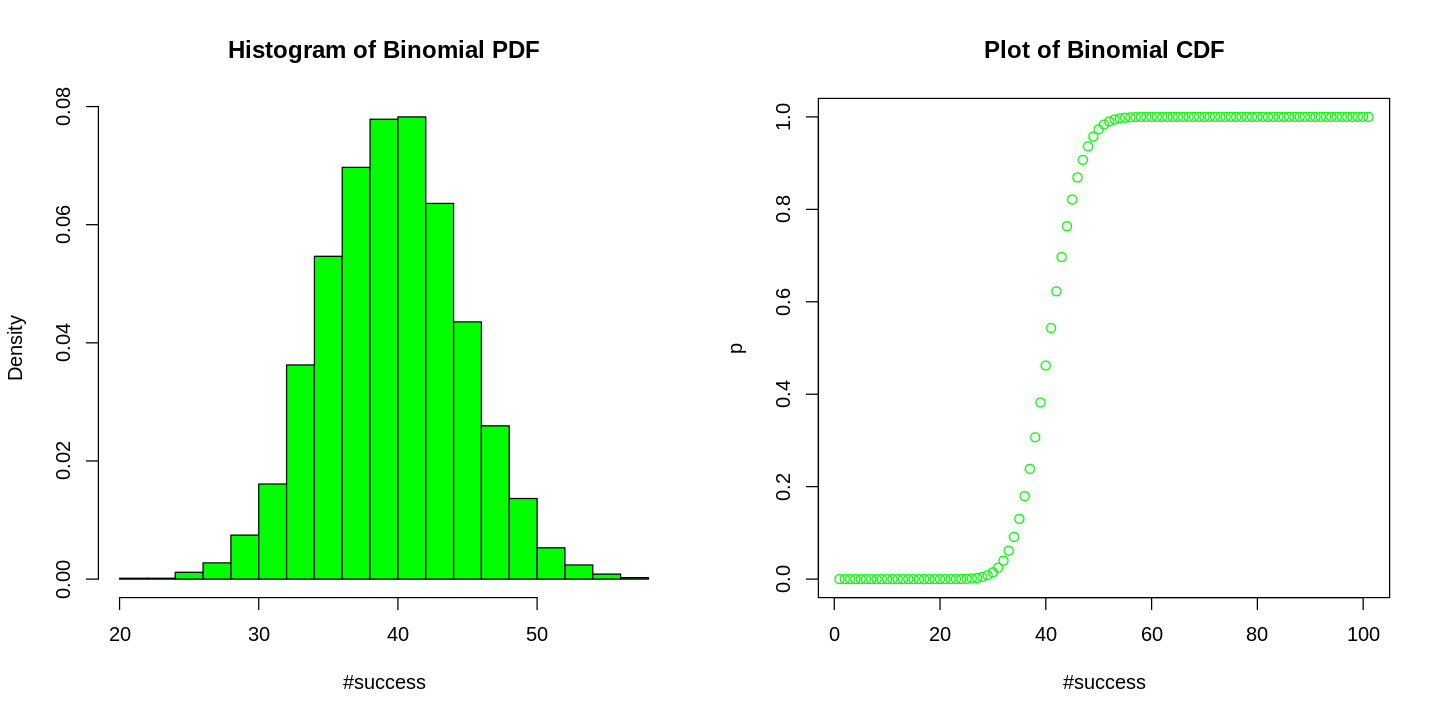

In [3]:
size <- 100
p    <- 0.4

ddata <- rbinom(n=N,      size=size, prob=p)
cdata <- pbinom(c(0:100), size=size, prob=p)

par(mfrow=c(1,2))
options(repr.plot.width=12, repr.plot.height=6)
hist(ddata, col='green', xlab='#success', main='Histogram of Binomial PDF', prob=TRUE)
plot(cdata, col='green', xlab='#success', main='Plot of Binomial CDF', ylab='p')

### 0.2. - Negative Binomial <a class="anchor" id="Ex0.2."></a>

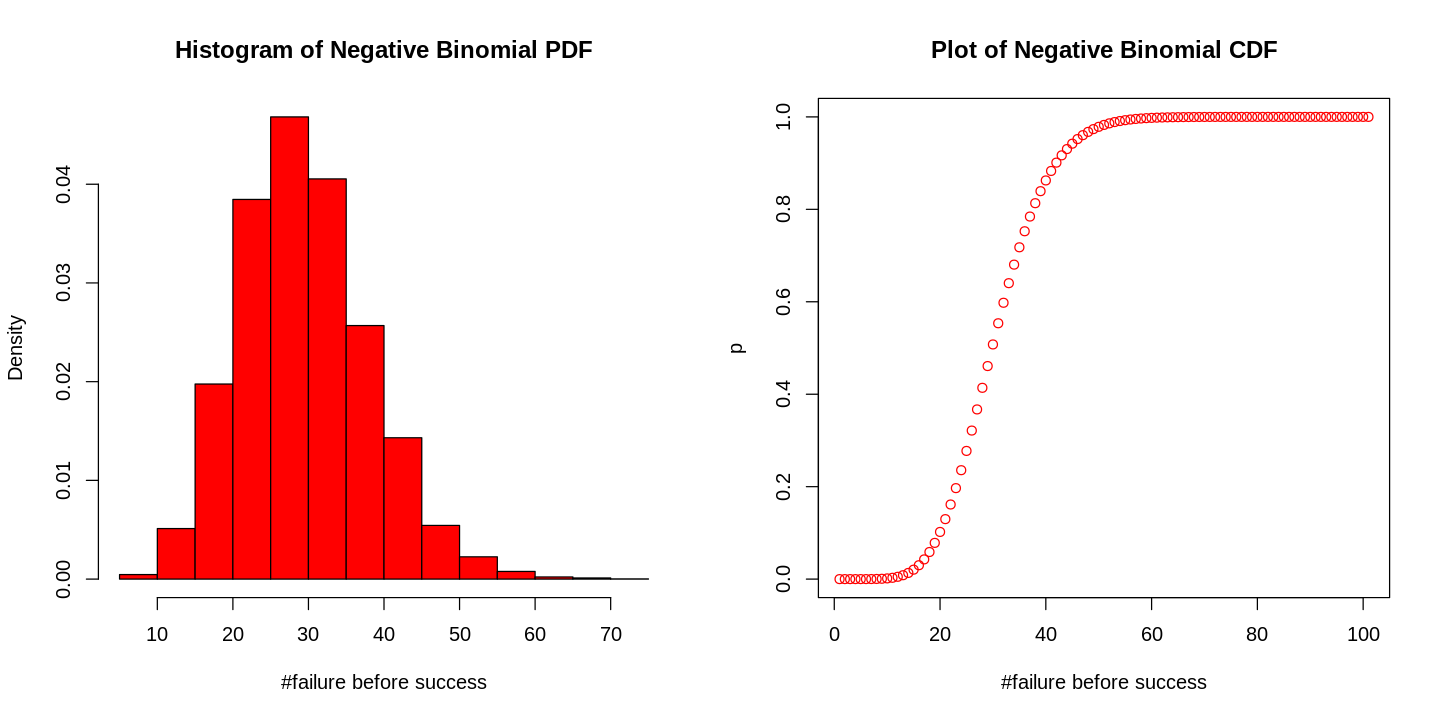

In [4]:
size <- 20
p    <- 0.4

ddata <- rnbinom(n=N,      size=size, prob=p)
cdata <- pnbinom(c(0:100), size=size, prob=p)

par(mfrow=c(1,2))
options(repr.plot.width=12, repr.plot.height=6)
hist(ddata, col='red', xlab='#failure before success', main='Histogram of Negative Binomial PDF', prob=TRUE)
plot(cdata, col='red', xlab='#failure before success', main='Plot of Negative Binomial CDF', ylab='p')

### 0.3. - Poisson <a class="anchor" id="Ex0.3."></a>

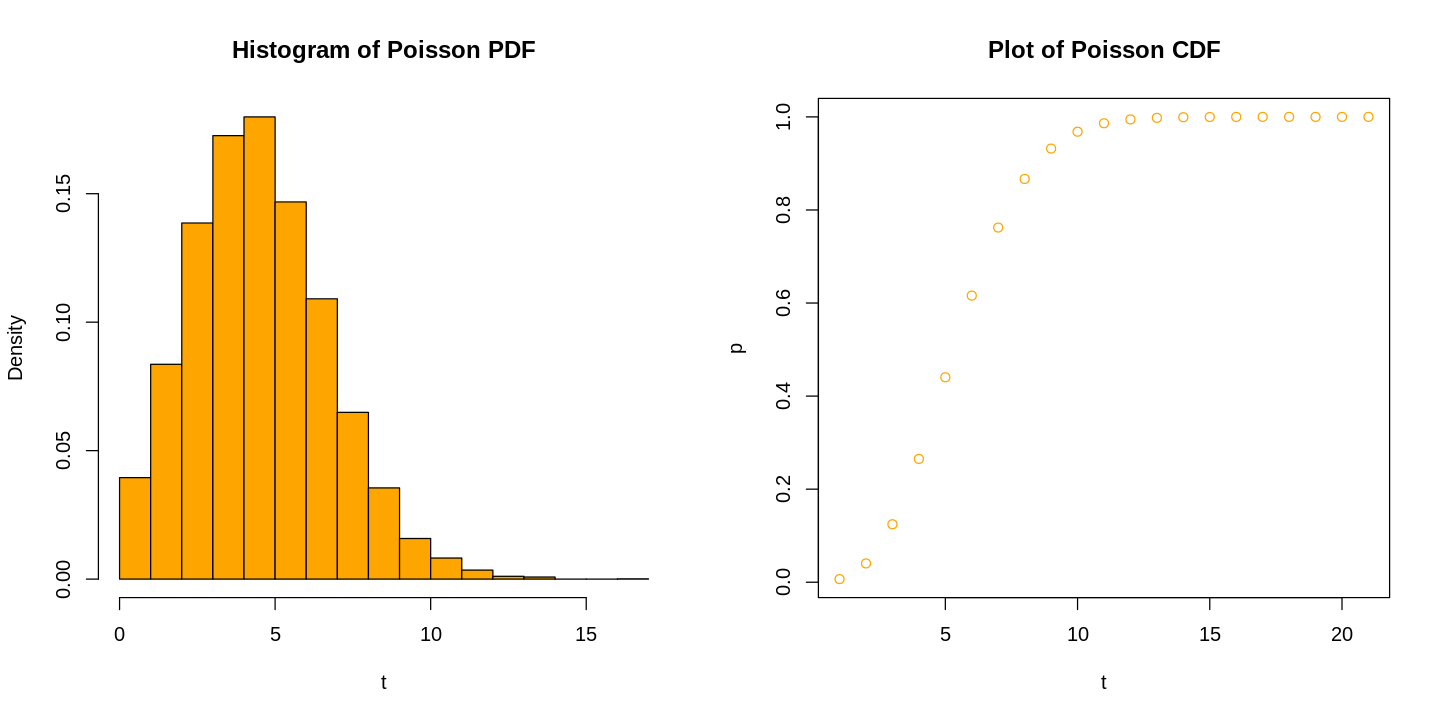

In [5]:
lambda <- 5

ddata <- rpois(n=N,     lambda=lambda)
cdata <- ppois(c(0:20), lambda=lambda)

par(mfrow=c(1,2))
options(repr.plot.width=12, repr.plot.height=6)
hist(ddata, col='orange', xlab='t', main='Histogram of Poisson PDF', prob=TRUE)
plot(cdata, col='orange', xlab='t', main='Plot of Poisson CDF', ylab='p')

### 0.4. - Geometric <a class="anchor" id="Ex0.4."></a>

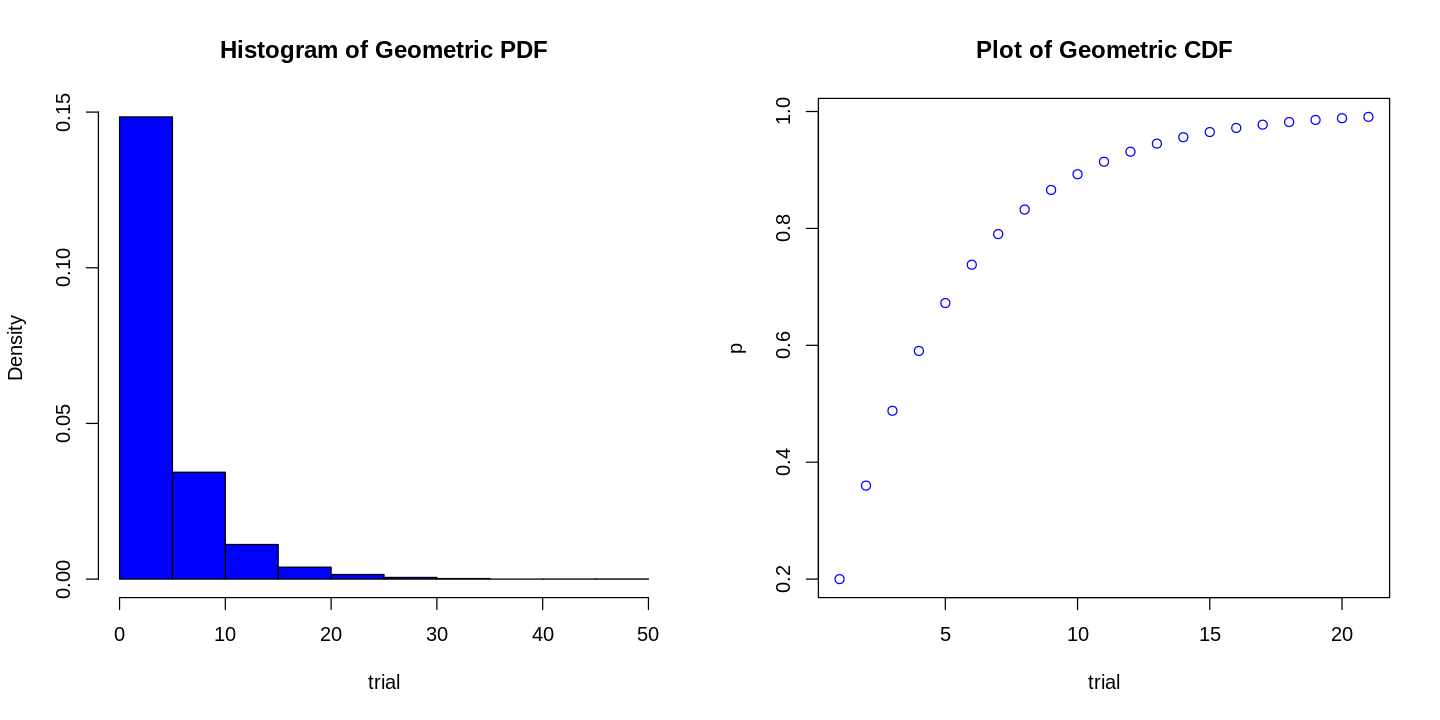

In [6]:
prob <- 0.2

ddata <- rgeom(n=N,     prob=prob)
cdata <- pgeom(c(0:20), prob=prob)

par(mfrow=c(1,2))
options(repr.plot.width=12, repr.plot.height=6)
hist(ddata, col='blue', xlab='trial', main='Histogram of Geometric PDF', prob=TRUE)
plot(cdata, col='blue', xlab='trial', main='Plot of Geometric CDF', ylab='p')

***
## Exercise 1 <a class="anchor" id="Ex1."></a>
* [Index](#ExI)
***

**Load data into the notebook**

In [7]:
x   <- c(15.58, 15.9, 16, 16.1, 16.2)
p.1 <- c(0.15, 0.21, 0.35, 0.15, 0.14)
p.2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)

**Check if the sum of the probability vectors is 1**

In [8]:
sum(p.1)==1
sum(p.2)==1

[1] TRUE

[1] TRUE

**Compute expected value and variance for both methods**

In [9]:
w.mean.1 <- weighted.mean(x, p.1)
w.mean.2 <- weighted.mean(x, p.2)
w.var.1  <- sum(p.1 * (x - w.mean.1)^2)
w.var.2  <- sum(p.2 * (x - w.mean.2)^2)

In [10]:
cat("Weighted mean for the 1st method:", w.mean.1, "\n")
cat("Variance for the 1st method:     ", w.var.1,  "\n\n")

cat("Weighted mean for the 2nd method:", w.mean.2, "\n")
cat("Variance for the 2nd method:     ", w.var.2)

Weighted mean for the 1st method: 15.959 
Variance for the 1st method:      0.033979 

Weighted mean for the 2nd method: 15.9622 
Variance for the 2nd method:      0.02816716

**We can see how the two methods give expected values not significantly different. However the second method returns a slightly lower variance.**

***
## Exercise 2 <a class="anchor" id="Ex2."></a>
* [Index](#ExI)
***

### 2.1. - Simulation of 50 people (samples) <a class="anchor" id="Ex2.1."></a>

**Sample 50 points from exponential distribution with rate $\frac{1}{30}$**

In [11]:
data <- rexp(n=50, rate=1/30)

**Plot histogram**

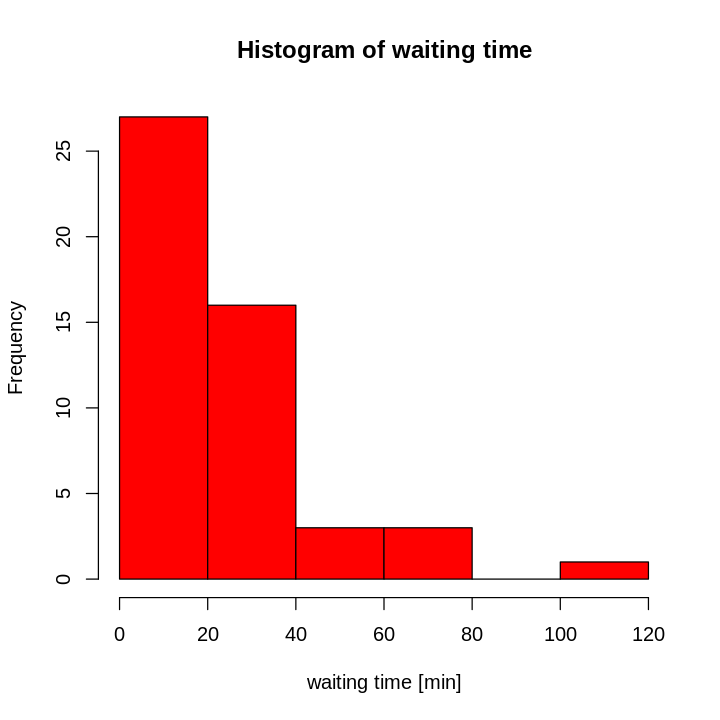

In [12]:
options(repr.plot.width=6, repr.plot.height=6)
hist(data, 
     col='red', 
     xlab='waiting time [min]', 
     main='Histogram of waiting time')

### 2.2. - Probability calculation 1 <a class="anchor" id="Ex2.2."></a>

**Probability that a person will wait for less than 10 minutes and comparison with theory**

In [13]:
p.wt.less.10 <- length(data[data < 10]) / length(data)

cat("Prob of waiting time",
    "less than 10 min",
    "(from simulated data):", p.wt.less.10, "\n")

cat("Prob of waiting time",
    "less than 10 min",
    "(from theory):        ", pexp(q=10, rate=1/30))

Prob of waiting time less than 10 min (from simulated data): 0.24 
Prob of waiting time less than 10 min (from theory):         0.2834687

### 2.3. - Average waiting time calculation and comparison <a class="anchor" id="Ex2.3."></a>

**Compute mean and standard deviation from simulated data**

In [14]:
wt.mean <- mean(data)
wt.std  <- sd(data)

In [15]:
cat("Average waiting time (from simulated data):       ",
    wt.mean, "\n")

cat("S.d. of medium waiting time (from simulated data):",
    wt.std / length(data), "\n\n")

cat("Difference from theory:                           ", 
    abs(wt.mean - 30))

Average waiting time (from simulated data):        24.64532 
S.d. of medium waiting time (from simulated data): 0.4555212 

Difference from theory:                            5.354684

**N.B.: The calculation from theory can be done through an integral**

In [16]:
cat("Average waiting time from theory:",
    integrate(function(x) x*dexp(x, rate=1/30), lower=0, upper=Inf)$value,
    "min")

Average waiting time from theory: 30 min

### 2.4. - Probability calculation 2 <a class="anchor" id="Ex2.4."></a>

In [17]:
p.wt.more.60 <- length(data[data > 60]) / length(data)

cat("Prob of waiting time",
    "more than 60 min",
    "(from simulated data):", p.wt.more.60, "\n")

cat("Prob of waiting time",
    "more than 60 min",
    "(from theory):        ", 1 - pexp(q=60, rate=1/30), "\n")

Prob of waiting time more than 60 min (from simulated data): 0.08 
Prob of waiting time more than 60 min (from theory):         0.1353353 


**To conclude this exercise, we can see how the calculations from the simulated data are deeply affected by the small number of samples simulated.**

***
## Exercise 3 <a class="anchor" id="Ex3."></a>
* [Index](#ExI)
***

**Suppose that the number of errors on a single page follows a Poisson distribution with $\lambda=\frac{1}{3}$**

In [18]:
x.pdf <- c(0:10)
y.pdf <- dpois(x=x.pdf, lambda=1/3)

**Plot the PDF of errors on a single page**

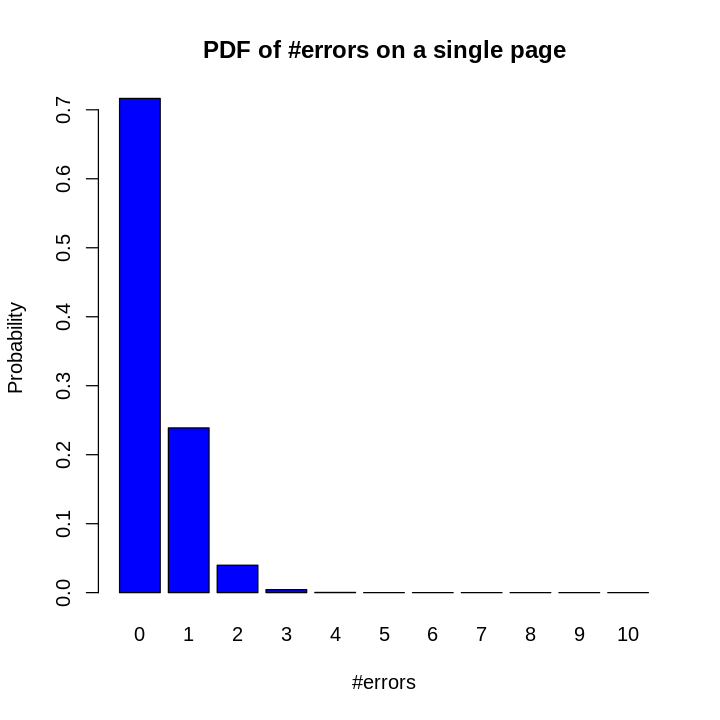

In [19]:
options(repr.plot.width=6, repr.plot.height=6)
barplot(height=y.pdf, 
        col='blue', 
        names.arg=x.pdf,
        xlab='#errors', 
        ylab='Probability',
        main='PDF of #errors on a single page')

In [20]:
x.cdf <- c(0:20)
y.cdf <- ppois(x.cdf, lambda=1/3)

**Plot the CDF of errors on a single page**

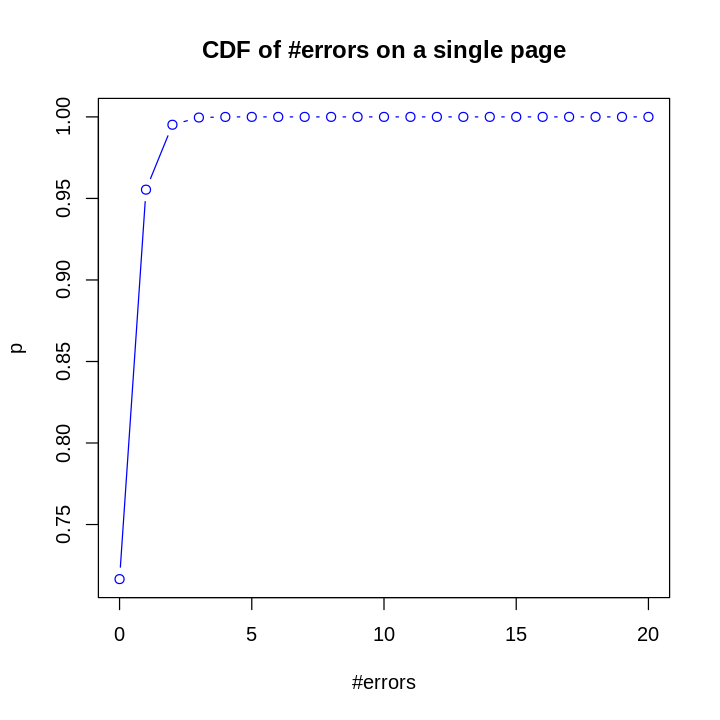

In [21]:
plot(x.cdf, 
     y.cdf, 
     type='b', 
     col='blue', 
     xlab='#errors', 
     ylab='p', 
     main='CDF of #errors on a single page')

**Probability that there is at least one error on a specific page of the book**

In [22]:
prob <- 1 - ppois(0, lambda=1/3)

In [23]:
cat("Prob of at least one error on a specific page:", prob)

Prob of at least one error on a specific page: 0.2834687

***
## Exercise 4 <a class="anchor" id="Ex4."></a>
* [Index](#ExI)
***

**Calculate the needed quantities for the exercise**

In [24]:
n.cards <- 52
n.aces  <-  4
prob    <- n.aces/n.cards

In [25]:
cat("Probability of drawing an ace (single extraction):", prob)

Probability of drawing an ace (single extraction): 0.07692308

**Simulation of the process**

In [26]:
n.repetitions <- 1e4
results <- c(1:n.repetitions)*0

for (i in 1:n.repetitions) {
    n <- 1
    while (runif(1) > 4/52) {
        n <- n+1
    }
    results[i] <- n
}

results.sim <- table(results)[table(results) > 0] / n.repetitions

**Theory: negative binomial distribution**

In [27]:
results.th <- dnbinom(c(0:20), size=1, prob=prob)

**Plot histogram of the results**

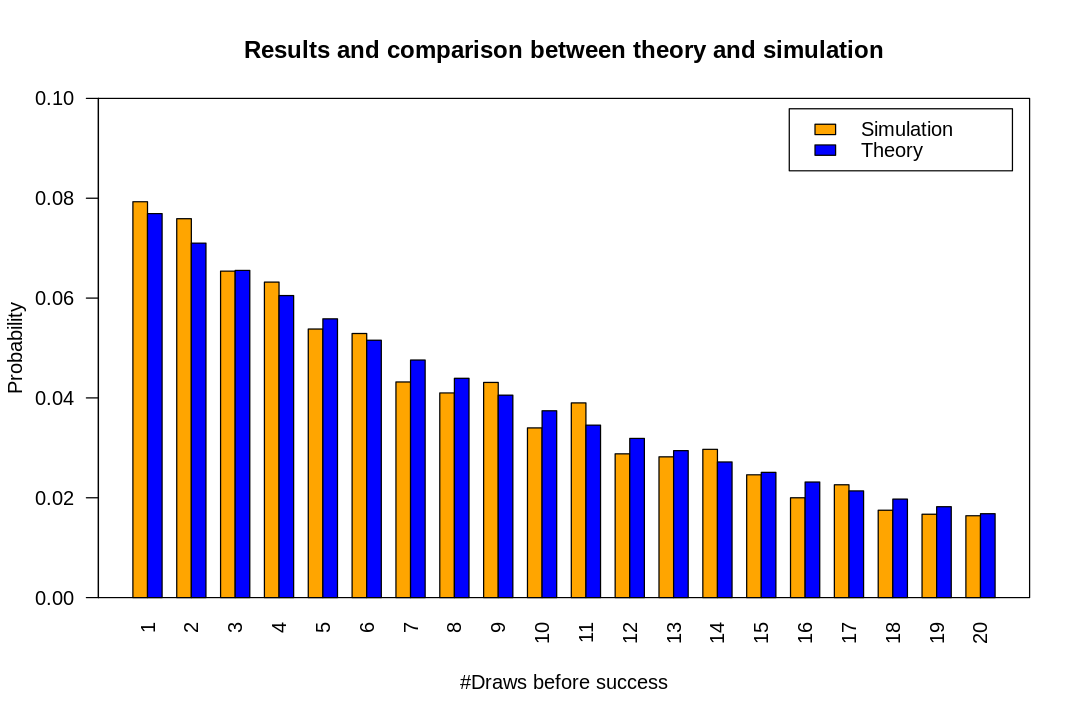

In [28]:
options(repr.plot.width=9, repr.plot.height=6)
barplot(rbind(results.sim[1:20], results.th[1:20]),
     legend.text=c("Simulation", "Theory"),
     ylim=c(0,0.10),
     col=c('orange', 'blue'),
     las=2,
     xlab='#Draws before success',
     ylab='Probability',
     main='Results and comparison between theory and simulation',
     beside = TRUE)
box()

**Probability of at least 10 extractions before success**

In [29]:
prob.10.sim <- length(results[results >= 10])/length(results)
prob.10.th  <- 1 - pnbinom(q=8, size=1, prob=prob) # p of at least 9 failures (>=10 draws for success)

In [30]:
cat("Prob of at least 10 draws (sim):", prob.10.sim, "\n")
cat("Prob of at least 10 draws (th) :", prob.10.th )

Prob of at least 10 draws (sim): 0.4822 
Prob of at least 10 draws (th) : 0.4865652

***
## Exercise 5 <a class="anchor" id="Ex5."></a>
* [Index](#ExI)
***

**Code to avoid tedious warnings when displaying the data.frame**

In [31]:
Sys.setlocale('LC_ALL','C')

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=it_IT.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=it_IT.UTF-8;LC_IDENTIFICATION=C"

**Load needed packages**

In [32]:
library(lubridate)


Attaching package: 'lubridate'


The following object is masked from 'package:base':

    date




**Read .csv file and put data into a data.frame**

In [33]:
mayors <- read.csv2("sindaciincarica.csv", skip=2)

**Show the first rows of the data.frame to check if everything is ok**

In [34]:
head(mayors)

,codice_regione,codice_provincia,codice_comune,denominazione_comune,sigla_provincia,popolazione_censita,titolo_accademico,cognome,nome,sesso,data_nascita,luogo_nascita,descrizione_carica,data_elezione,data_entrata_in_carica,partito,titolo_studio,professione
,<int>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,2,10,ACQUI TERME,AL,20054,,LUCCHINI,LORENZO GIUSEPPE,M,18/08/1963,REGNO UNITO,Sindaco,11/06/2017,26/06/2017,MOVIMENTO 5 STELLE.IT,LAUREA BREVE,SPECIALISTI E TECNICI NELLE SCIENZE DELLA SALUTE E ADDETTI A SERVIZI SANITARI
2,1,2,20,ALBERA LIGURE,AL,329,,LOVOTTI,RENATO,M,23/12/1946,ROCCHETTA LIGURE (AL),Sindaco,26/05/2019,27/05/2019,LISTA CIVICA: INSIEME PER ALBERA,TITOLI O DIPLOMI PROFESSIONALI POST LIC.ELEMENTARE,PERSONE RITIRATE DAL LAVORO
3,1,2,30,ALESSANDRIA,AL,89411,PROF,CUTTICA DI REVIGLIASCO,GIANFRANCO,M,30/06/1957,TORINO (TO),Sindaco,11/06/2017,27/06/2017,FRATELLI D'ITALIA - ALLEANZA NAZIONALE | FORZA ITALIA | LEGA NORD | LISTA CIVICA: SIAMO ALESSANDRIA,LAUREA,PROFESSORI DI SCUOLA SECONDARIA SUPERIORE E ASSIMILATI
4,1,2,40,ALFIANO NATTA,AL,754,,ZEGLIO,SABRINA,F,31/03/1971,TORINO (TO),Sindaco,26/05/2019,27/05/2019,LISTA CIVICA: INSIEME PER IL FUTURO,LAUREA,AVVOCATI E PROCURATORI LEGALI
5,1,2,50,ALICE BEL COLLE,AL,774,ARCH,MARTINO,GIANFRANCO,M,09/08/1972,ACQUI TERME (AL),Sindaco,11/06/2017,11/06/2017,LISTA CIVICA: UNITI PER CRESCERE,LAUREA,"IMPIEGATI DI AMMINISTRAZIONI, ORGANI ED ENTI PUBBLICI (NON RICOMPRESI IN ALTRE SPECIFICHE CLASSIFICAZIONI)"
6,1,2,62,ALLUVIONI PIOVERA,AL,1791,,BETTI,GIUSEPPE FRANCESCO,M,08/02/1953,ALLUVIONI CAMBIO' (AL),Sindaco,10/06/2018,11/06/2018,LISTA CIVICA: PIU' FORTI INSIEME,,


### 5.1. - Gender distribution <a class="anchor" id="Ex5.1."></a>

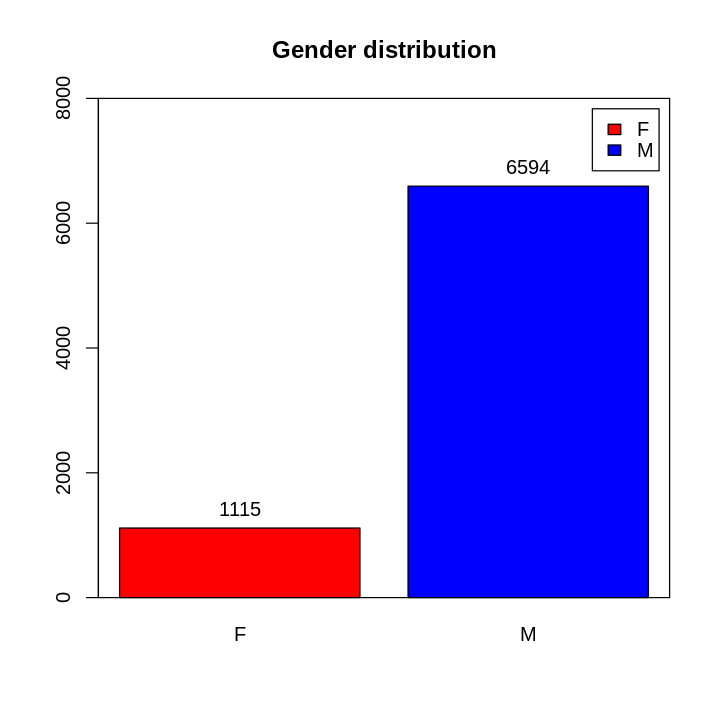

In [35]:
options(repr.plot.width=6, repr.plot.height=6)
bp <- barplot(table(mayors$sesso), 
              legend.text=c("F","M"),
              col=c('red','blue'), 
              ylim=c(0,8000),
              main="Gender distribution")
text(x=bp, 
     y=as.vector(table(mayors$sesso)), 
     labels=as.vector(table(mayors$sesso)), 
     pos=3, 
     col="black")
box()

### 5.2. - Number of towns grouped per province and per region <a class="anchor" id="Ex5.2."></a>

**Distribution of towns grouped per province (to enlarge the plot, left click two times on it)**

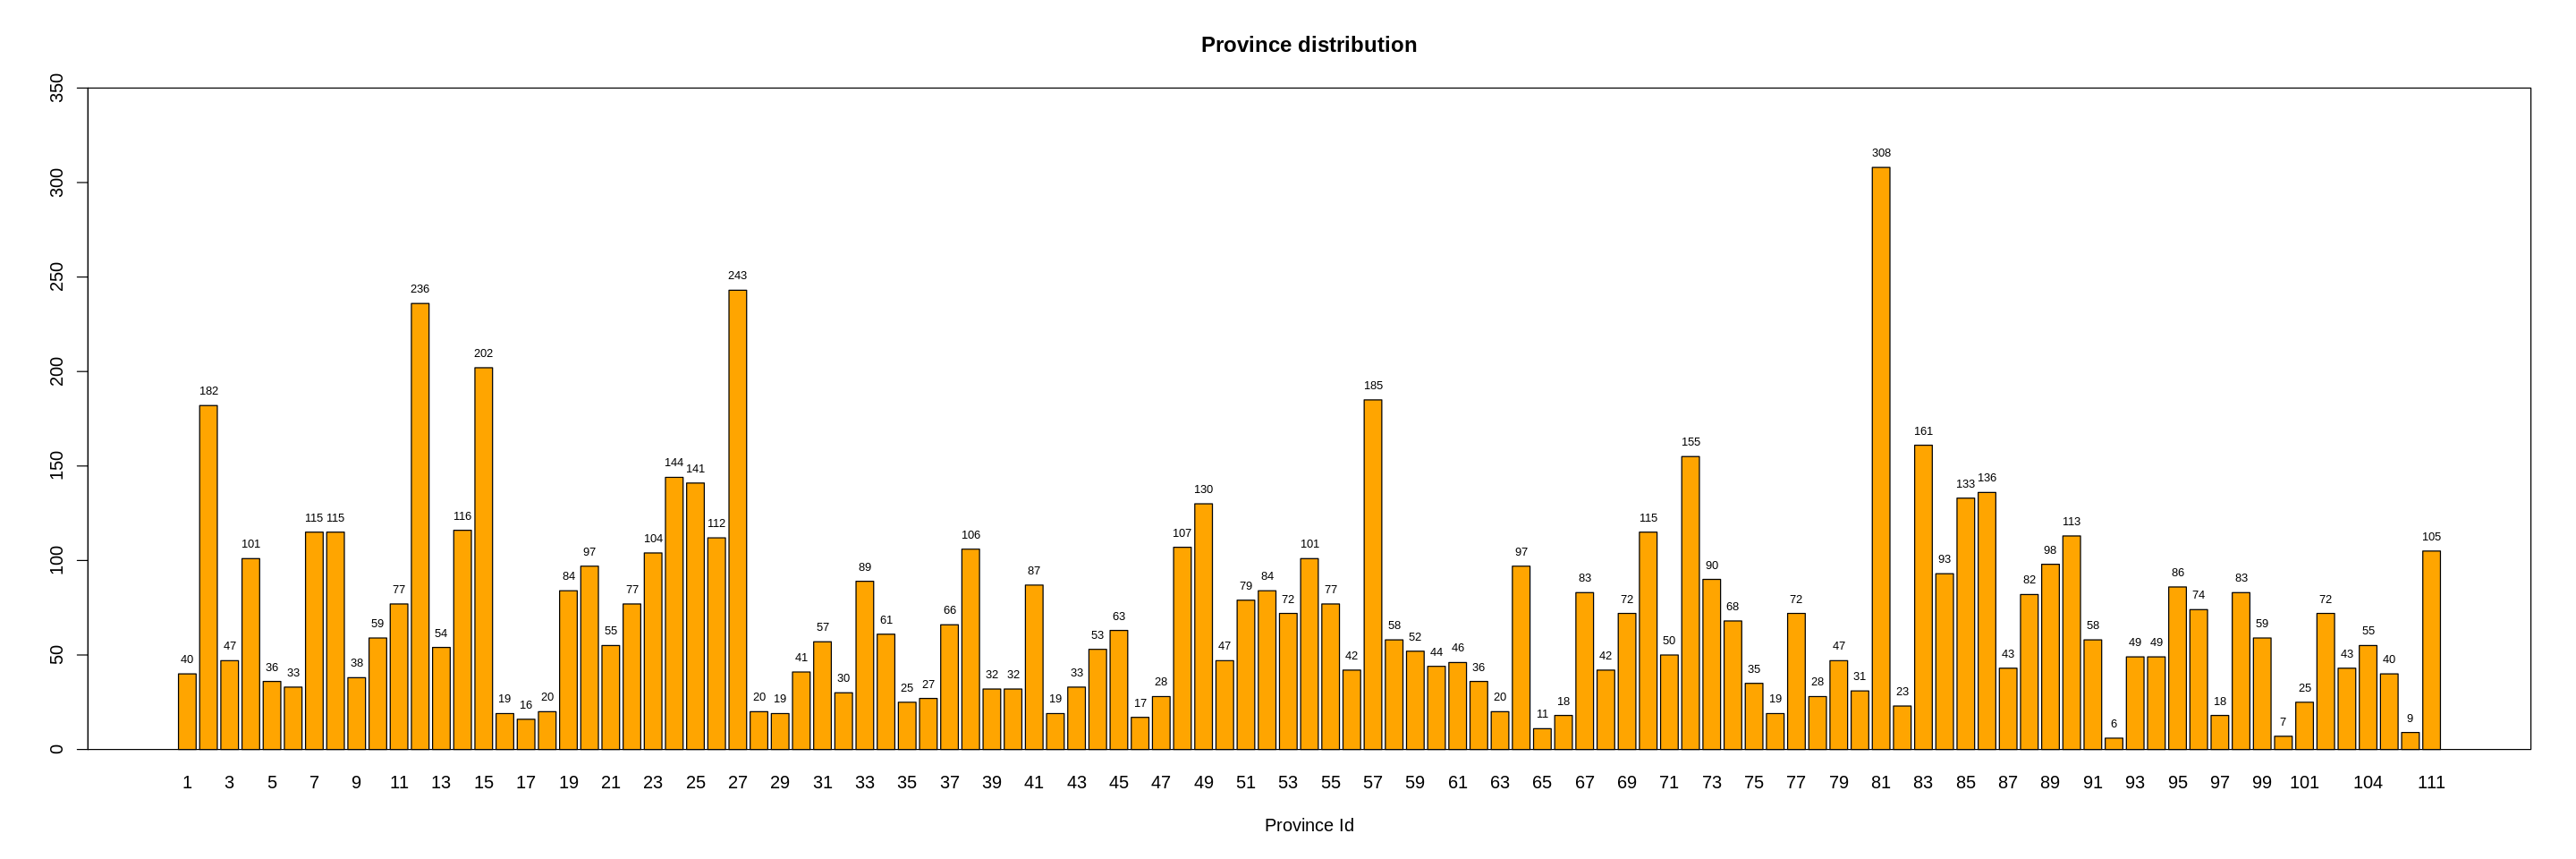

In [36]:
options(repr.plot.width=24, repr.plot.height=8)
bp <- barplot(table(mayors$codice_provincia), 
              ylim=c(0,350),
              col='orange', 
              xlab='Province Id',
              main="Province distribution")
text(x=bp,
     y=as.vector(table(mayors$codice_provincia)), 
     labels=as.vector(table(mayors$codice_provincia)), 
     pos=3, 
     cex = 0.65,
     col="black")
box()

**Distribution of towns grouped per region**

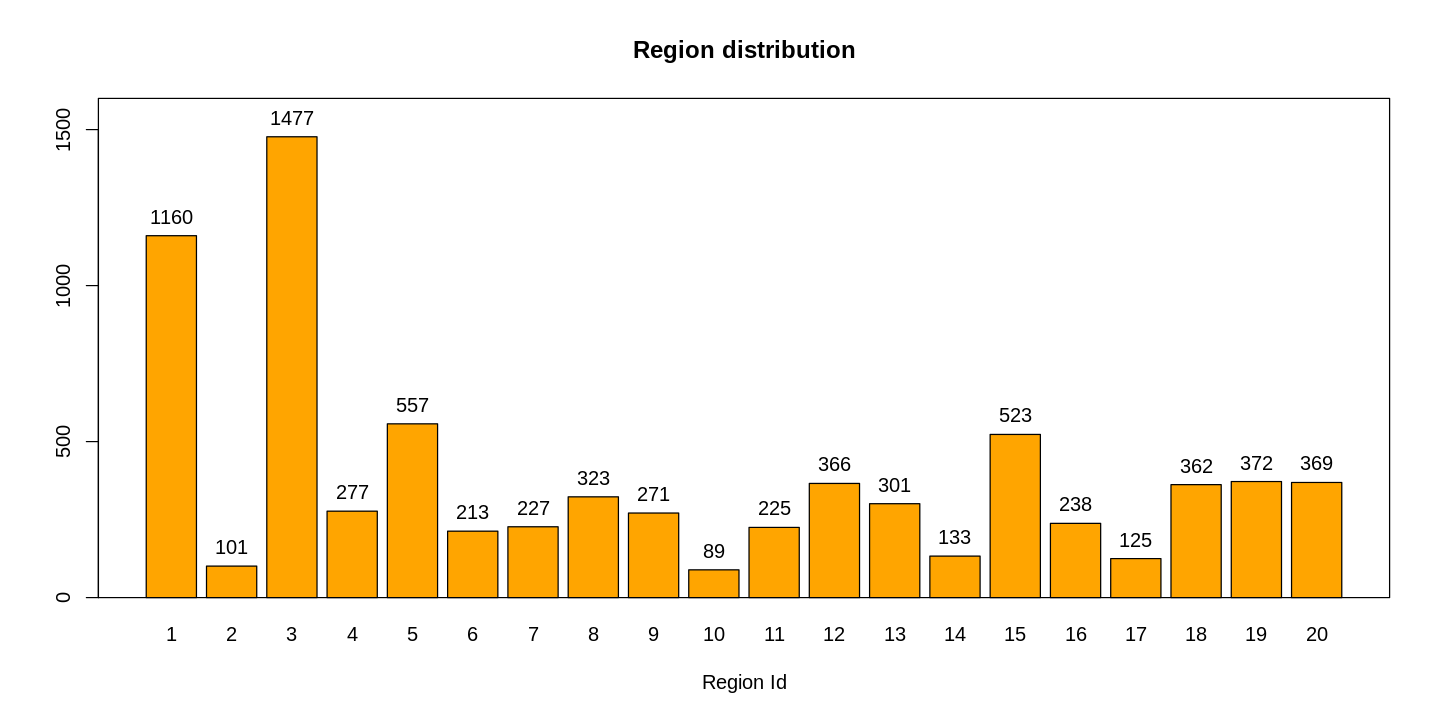

In [37]:
options(repr.plot.width=12, repr.plot.height=6)
bp <- barplot(table(mayors$codice_regione),
              ylim=c(0,1600),
              col='orange', 
              xlab='Region Id',
              main="Region distribution")
text(x=bp, 
     y=as.vector(table(mayors$codice_regione)), 
     labels=as.vector(table(mayors$codice_regione)), 
     pos=3, 
     col="black")
box()

**Distribution of towns grouped per province and per region**

In [38]:
towns.province.regions <- table(mayors$codice_provincia, 
                                mayors$codice_regione)
y     <- as.vector(margin.table(towns.province.regions,2))

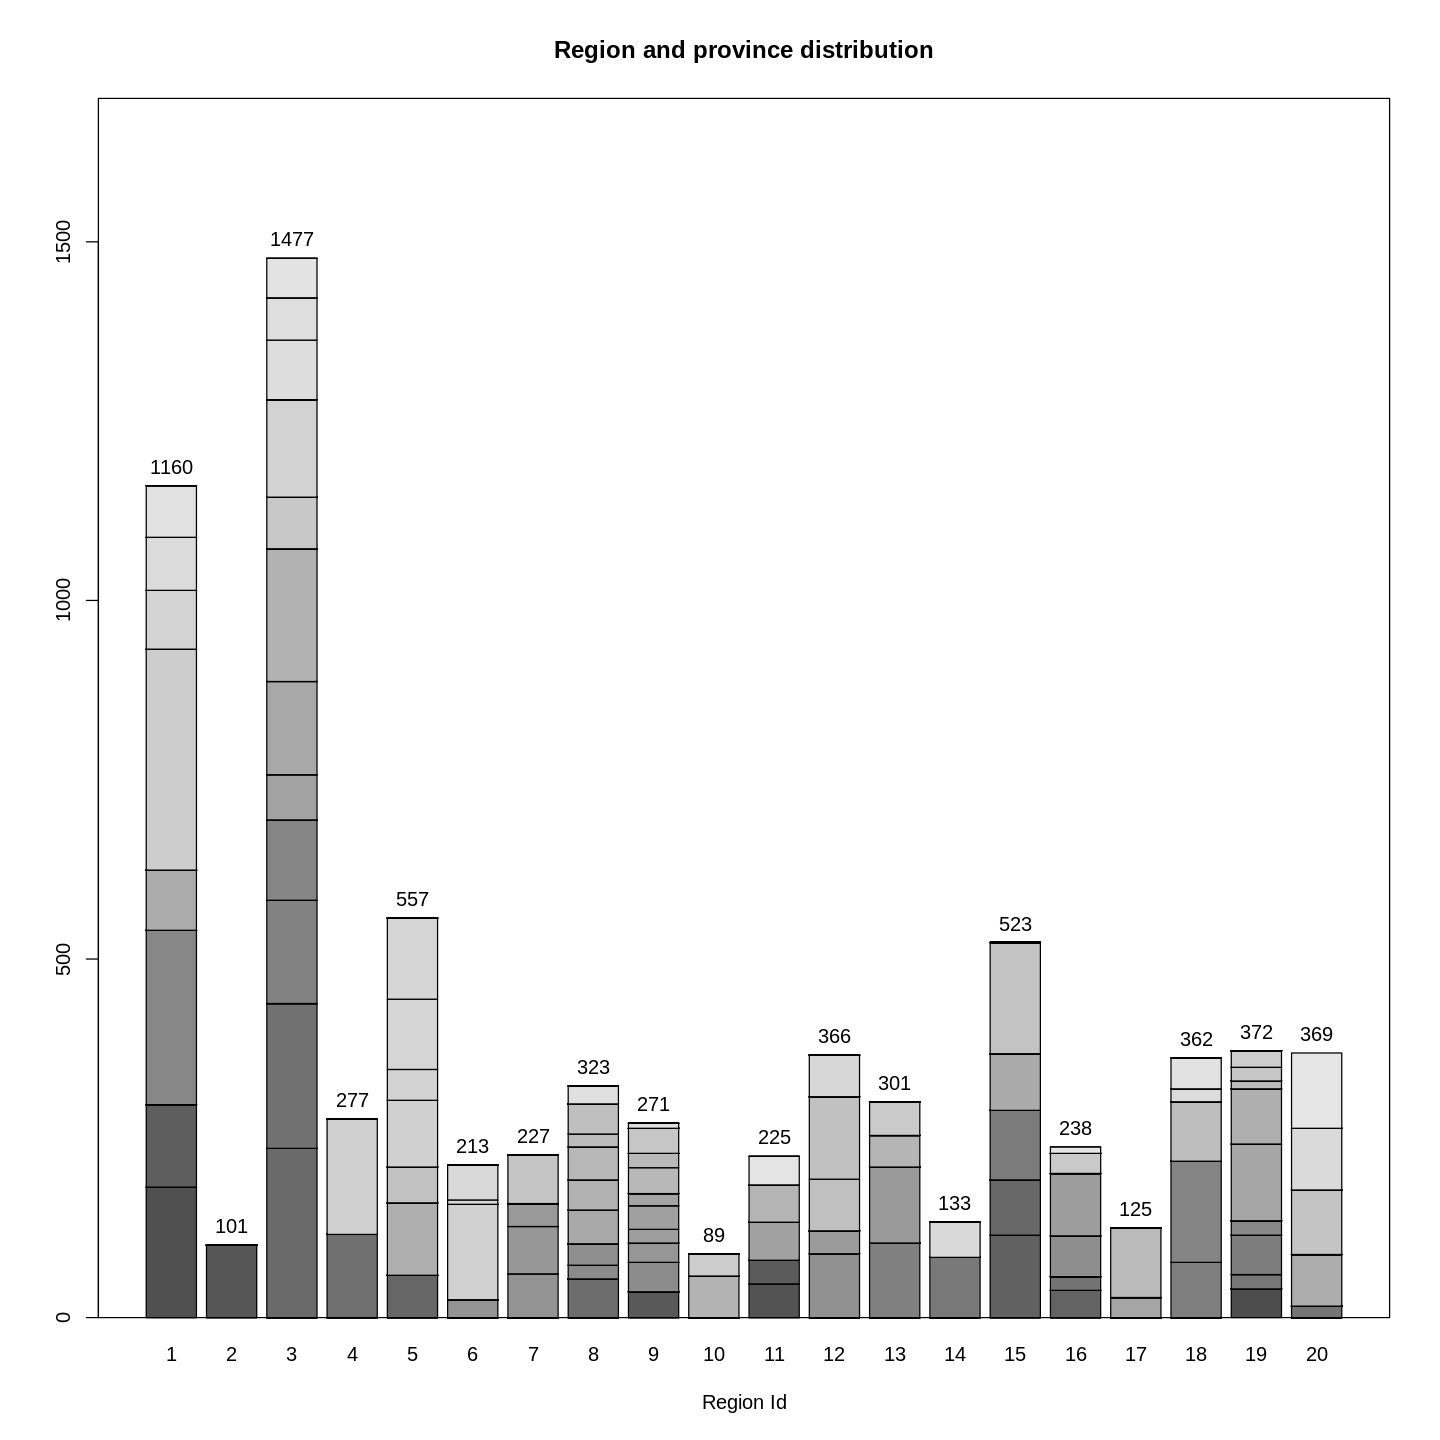

In [39]:
options(repr.plot.width=12, repr.plot.height=12)
bp <- barplot(towns.province.regions,
              ylim=c(0,1700),
              xlab="Region Id",
              main="Region and province distribution")
text(x=bp, y=y, labels=y, pos=3, col="black")
box()

### 5.3. - Distribution of the age (years only) of the mayors <a class="anchor" id="Ex5.3."></a>

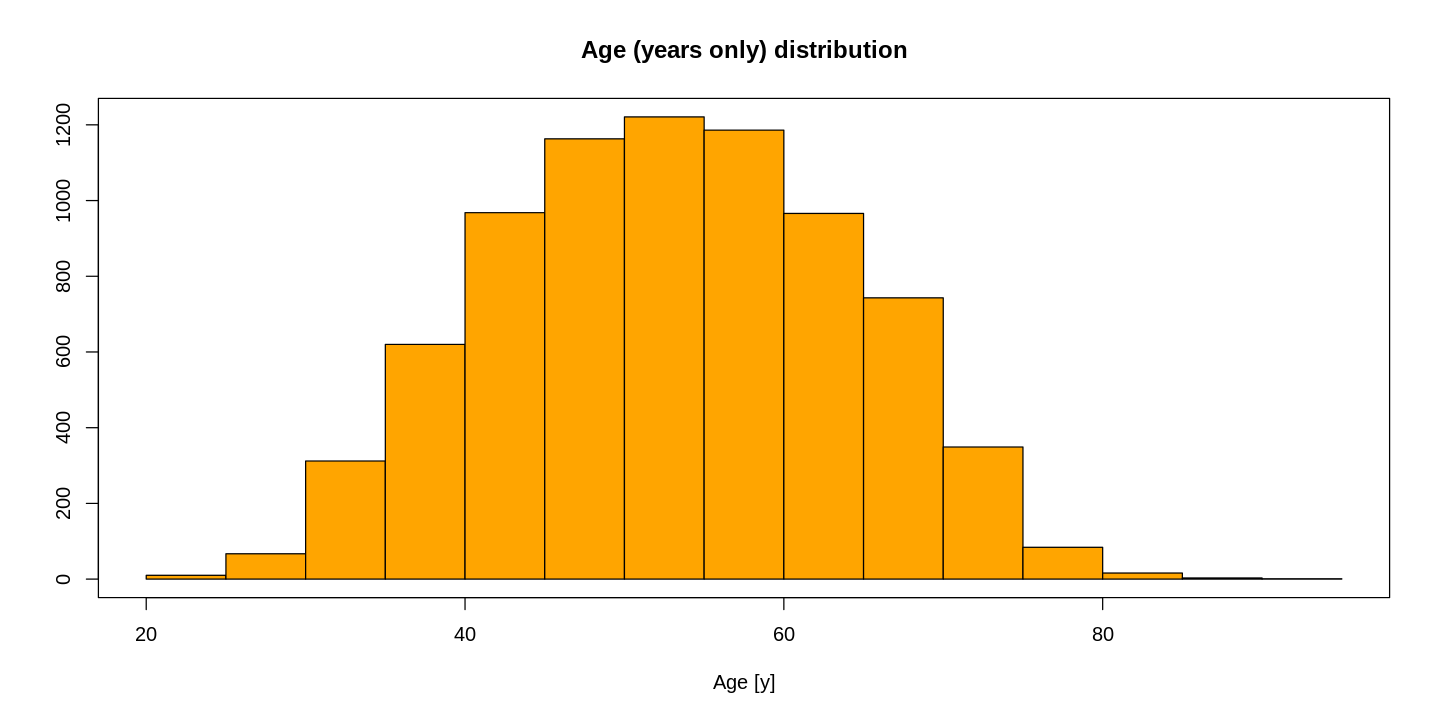

In [40]:
options(repr.plot.width=12, repr.plot.height=6)
hist(2020 - year(dmy(mayors$data_nascita)),
     col='orange',
     xlab="Age [y]",
     ylab="",
     main="Age (years only) distribution")
box()

### 5.4. - Distribution of the time the mayor is in charge <a class="anchor" id="Ex5.4."></a>

**Histogram of days in charge**

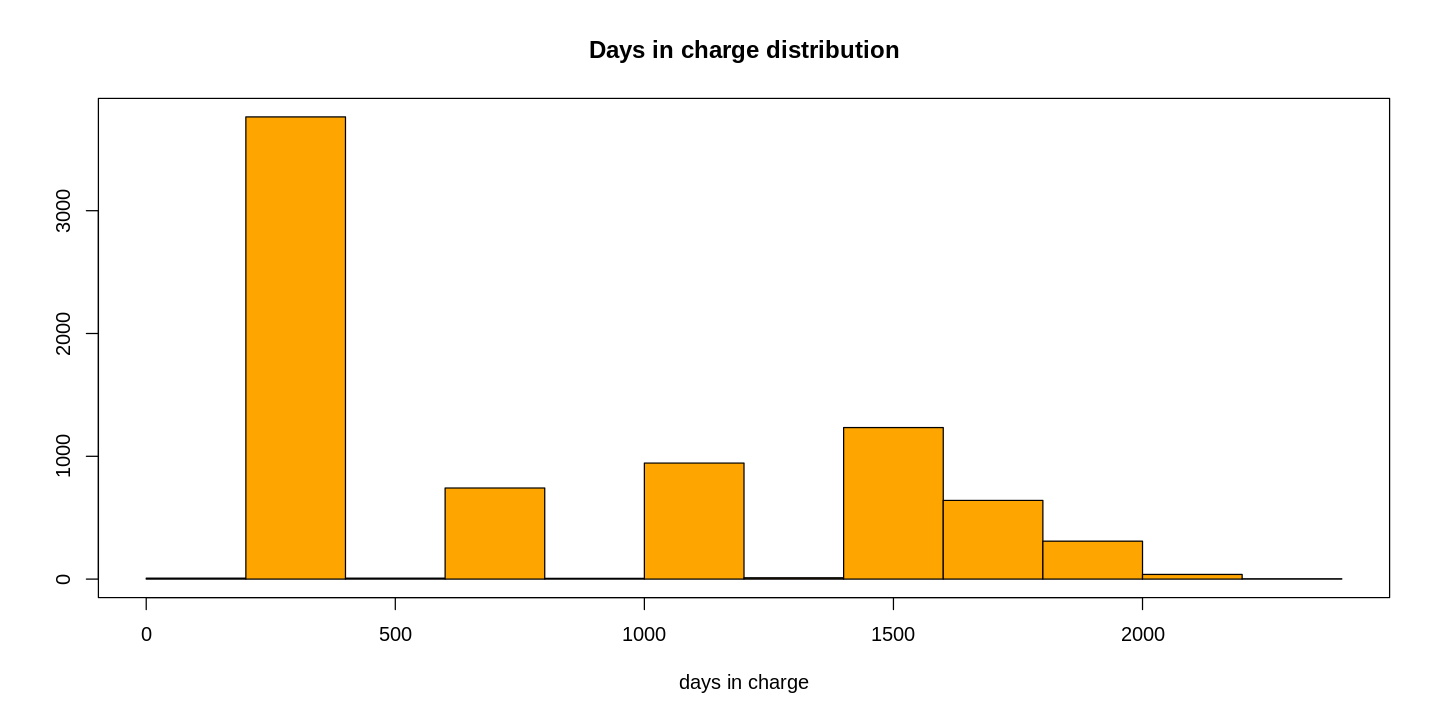

In [41]:
days <- as.vector(difftime(today(),
                           dmy(mayors$data_elezione),
                           units = c("days")))
hist(days, 
     col='orange',
     xlab="days in charge",
     ylab="",
     main="Days in charge distribution")
box()

**Mayors ending their mandate**

In [42]:
t.finish <- dmy(mayors$data_elezione) %m+% years(5)
y.finish <- year(t.finish)

In [43]:
n.2020 <- length(y.finish[y.finish==2020])
n.2021 <- length(y.finish[y.finish==2021])
n.2022 <- length(y.finish[y.finish==2022])
n.2023 <- length(y.finish[y.finish==2023])
n.2024 <- length(y.finish[y.finish==2024])

cat("Number of mayors ending in 2020:", n.2020, "\n")
cat("Number of mayors ending in 2021:", n.2021, "\n")
cat("Number of mayors ending in 2022:", n.2022, "\n")
cat("Number of mayors ending in 2023:", n.2023, "\n")
cat("Number of mayors ending in 2024:", n.2024, "\n")

Number of mayors ending in 2020: 943 
Number of mayors ending in 2021: 1245 
Number of mayors ending in 2022: 951 
Number of mayors ending in 2023: 749 
Number of mayors ending in 2024: 3773 
